# 准备工作

In [1]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
y,sr=librosa.load('test.wav')
ipd.Audio(y,rate=sr)

# 方案一 RMS均方根

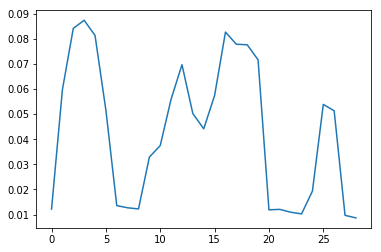

0.08740639


In [94]:
window_size=sr
hop_size=int(window_size/2)
frames=librosa.feature.rms(y,frame_length=window_size,hop_length=hop_size)
plt.plot(frames[0])
plt.show()
print(max(frames[0]))

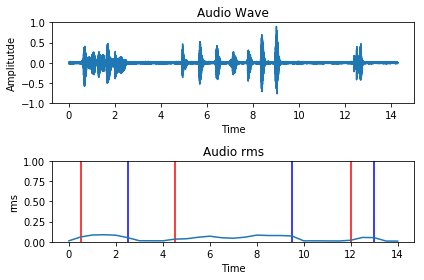

In [95]:
t1=np.arange(y.size)/sr
t2=np.arange(frames[0].size)*hop_size/sr
# print(y.size)
# print(frames[0].size*hop_size)

intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
vth=max(frames[0])/5
for i in range(frames[0].size):
    if i0<0:   
        if frames[0][i]>vth:
            i0=i*hop_size/sr
    else:    
        if frames[0][i]<vth:
            i1=(i-1)*hop_size/sr
            intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1

librosa.output.annotation('edges_1.csv',intervals)
        
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames[0])
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio rms',xlabel='Time',ylabel='rms',ylim=(0,1))
plt.tight_layout()
plt.show()

# 方案二 过零率

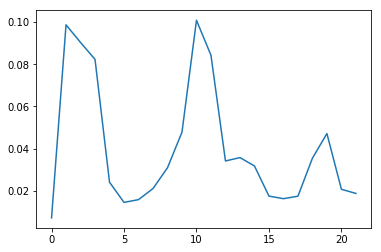

0.10081632653061225


22

In [24]:
window_size=sr
hop_size=int(window_size/1.5)
frames=librosa.feature.zero_crossing_rate(y,frame_length=window_size,hop_length=hop_size)
plt.plot(frames[0])
plt.show()
print(max(frames[0]))
frames[0].size

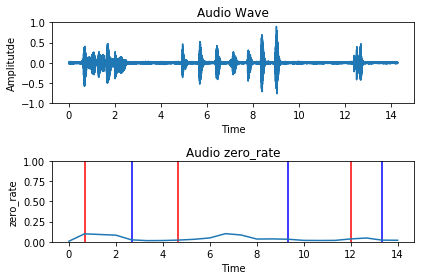

In [26]:
t1=np.arange(y.size)/sr
t2=np.arange(frames[0].size)*hop_size/sr
# print(y.size)
# print(frames[0].size*hop_size)

#计算端点
intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
vth=max(frames[0])/5
for i in range(frames[0].size):
    if i0<0:   
        if frames[0][i]>vth:
            i0=i*hop_size/sr
    else:    
        if frames[0][i]<vth:
            i1=(i-1)*hop_size/sr  
            intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1

#写入结束点
librosa.output.annotation('edges_2.csv',intervals)
        
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames[0])
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio zero_rate',xlabel='Time',ylabel='zero_rate',ylim=(0,1))
plt.tight_layout()
plt.show()

# 方案三 绝对值均值

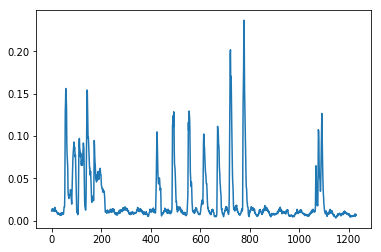

0.23648491501808167
0.0033334526233375072


1230

In [27]:
window_size=512
hop_size=256
y1=librosa.util.frame(y,frame_length=window_size,hop_length=hop_size).T
frames=np.zeros(y1.shape[0])
for i in range(y1.shape[0]):
    frames[i]=np.mean(np.abs(y1[i]))
plt.plot(frames)
plt.show()
print(max(frames))
print(min(frames))
len(frames)

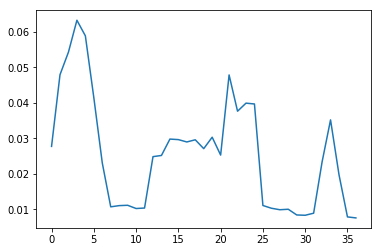

0.0632365481214947
0.007550219634140376


37

In [28]:
window_size=64
hop_size=32
y2=librosa.util.frame(frames,frame_length=window_size,hop_length=hop_size).T
frames=np.zeros(y2.shape[0])
for i in range(y2.shape[0]):
    frames[i]=np.mean(np.abs(y2[i]))
plt.plot(frames)
plt.show()
print(max(frames))
print(min(frames))
len(frames)

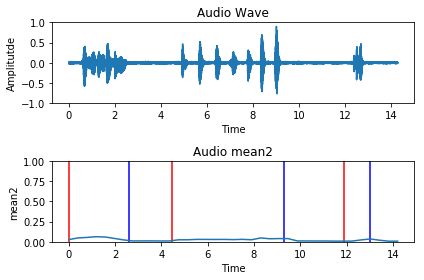

In [32]:
t1=np.arange(y.size)/sr
t2=np.arange(frames.size)*34*256/sr

intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
vth=max(frames)/5
for i in range(frames.size):
    if i0<0:   
        if frames[i]>vth:
            i0=i*32*256/sr
    else:    
        if frames[i]<vth:
            i1=i*32*256/sr
            intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1

librosa.output.annotation('edges_3.csv',intervals)
        
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames)
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio mean2',xlabel='Time',ylabel='mean2',ylim=(0,1))
plt.tight_layout()
plt.show()

# 方案四 flatness平坦度(第二段声音效果不理想)

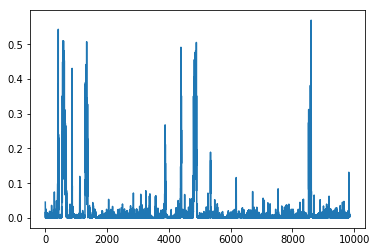

0.56914216


array([0.0454809 , 0.00134352, 0.00051194, ..., 0.00607699, 0.00217379,
       0.00859608], dtype=float32)

In [51]:
frames=librosa.feature.spectral_flatness(y,n_fft=64,hop_length=32)
# frames[0] = frames[0]/max(frames[0])
plt.plot(frames[0])
plt.show()
print(max(frames[0]))
frames[0]

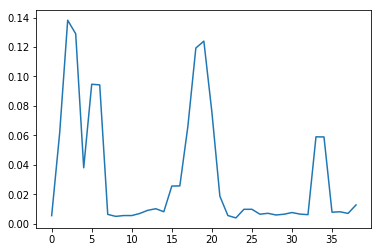

0.1381975


array([0.00551436, 0.06170205, 0.1381975 , 0.12899874, 0.0380175 ,
       0.09473024, 0.0942982 , 0.0063635 , 0.00501223, 0.00557701,
       0.0055572 , 0.00698944, 0.00912798, 0.01020346, 0.00816592,
       0.02559639, 0.02569904, 0.0658595 , 0.11933792, 0.12398344,
       0.0759792 , 0.01871256, 0.00558311, 0.00396546, 0.0098107 ,
       0.00982122, 0.00649032, 0.00710065, 0.00594985, 0.0064658 ,
       0.00762034, 0.00657192, 0.00616254, 0.05903445, 0.05894629,
       0.00785169, 0.00813596, 0.00702097, 0.01279932], dtype=float32)

In [64]:
frames2=librosa.feature.rms(frames[0],frame_length=512,hop_length=256)
plt.plot(frames2[0])
plt.show()
print(max(frames2[0]))
frames2[0]

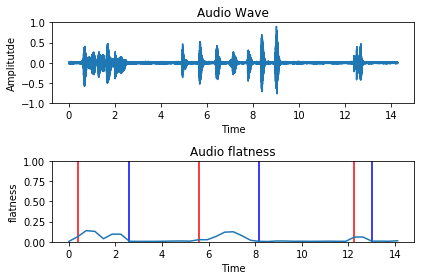

In [62]:
t1=np.arange(y.size)/sr
t2=np.arange(frames2[0].size)*32*256/sr

intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
vth1=max(frames2[0])/10
vth2=max(frames2[0])/10
for i in range(frames2[0].size):
    if i0<0:   
        if frames2[0][i]>vth1:
            i0=i*32*256/sr
    else:    
        if frames2[0][i]<vth2:
            i1=i*32*256/sr
            intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1

librosa.output.annotation('edges_4.csv',intervals)

f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames2[0])
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio flatness',xlabel='Time',ylabel='flatness',ylim=(0,1))
plt.tight_layout()
plt.show()

# 方案五 RMS逐值比较

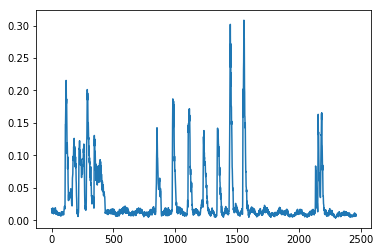

0.30819738


In [105]:
window_size=256
hop_size=128
frames=librosa.feature.rms(y,frame_length=window_size,hop_length=hop_size)
plt.plot(frames[0])
plt.show()
print(max(frames[0]))

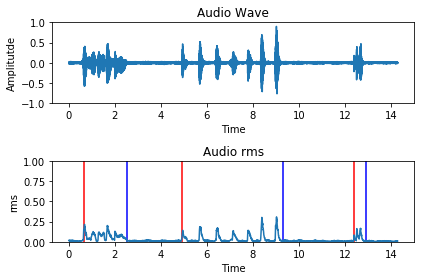

In [107]:
t1=np.arange(y.size)/sr
t2=np.arange(frames[0].size)*hop_size/sr
# print(y.size)
# print(frames[0].size*hop_size)

intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
temp = []
vth=max(frames[0])/5
for i in range(frames[0].size):
    if i0<0:   
        if frames[0][i]>vth:
            i0=i*hop_size/sr
    else:    
        if frames[0][i]<vth:
            i1=(i-1)*hop_size/sr
            temp.append(i0)
            temp.append(i1)
#             intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1

num = []
for i in range(len(temp)-2):
    if temp[i+1]-temp[i]<1:
        num.append(temp[i+1])
    if temp[i+1]-temp[i]>1:
        num.pop()
for i in num:
    temp.remove(i)
for i in range(int(len(temp)/2)):
    intervals=np.append(intervals,[[temp[2*i],temp[2*i+1]+0.2]],axis=0)
    
librosa.output.annotation('edges_5.csv',intervals)
        
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames[0])
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio rms',xlabel='Time',ylabel='rms',ylim=(0,1))
plt.tight_layout()
plt.show()

# 方案六 短时过零率 双门限法

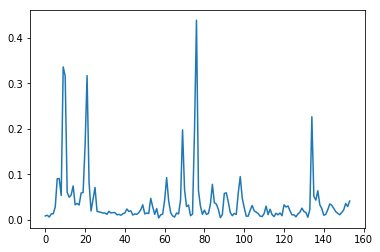

0.4384765625


154

In [119]:
window_size=2048
hop_size=2048
frames=librosa.feature.zero_crossing_rate(y,frame_length=window_size,hop_length=hop_size)
plt.plot(frames[0])
plt.show()
print(max(frames[0]))
frames[0].size

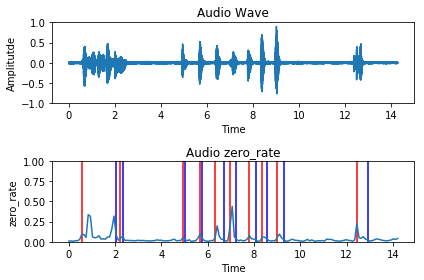

In [125]:
t1=np.arange(y.size)/sr
t2=np.arange(frames[0].size)*hop_size/sr
# print(y.size)
# print(frames[0].size*hop_size)

#计算端点
intervals=np.empty(shape=[0,2])
i0=-1  #起始点
i1=-1  #结束点
temp = []
vth=max(frames[0])/10
vth1=max(frames[0])/20
for i in range(frames[0].size):
    if i0<0:   
        if frames[0][i]>vth:
            i0=i*hop_size/sr
    else:    
        if frames[0][i]<vth1:
            i1=(i-1)*hop_size/sr  
            intervals=np.append(intervals,[[i0,i1]],axis=0)
            i0=-1
#写入结束点
librosa.output.annotation('edges_6.csv',intervals)

f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, y)
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1))
li2, = ax[1].plot(t2, frames[0])
ax[1].vlines(x=intervals[:,0],ymin=0,ymax=1,color='red')
ax[1].vlines(x=intervals[:,1],ymin=0,ymax=1,color='blue')
ax[1].set(title='Audio zero_rate',xlabel='Time',ylabel='zero_rate',ylim=(0,1))
plt.tight_layout()
plt.show()